In [6]:
from sklearn.cluster import DBSCAN, SpectralClustering, MeanShift,KMeans
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

import pickle

from collections import Counter



In [7]:
plt.style.use("seaborn")
%matplotlib inline
pd.set_option("display.max_columns", 101)

In [8]:
df = pickle.load(open('model_df5212019.p','rb'))

In [9]:
df.dropna(inplace=True)

In [10]:
list(df.columns)

['speed_10',
 'speed_25',
 'speed_50',
 'speed_75',
 'speed_90',
 'speed_ave',
 'accel_10',
 'accel_25',
 'accel_50',
 'accel_75',
 'accel_90',
 'accel_ave',
 'jerk_10',
 'jerk_25',
 'jerk_50',
 'jerk_75',
 'jerk_90',
 'jerk_ave',
 'bearingRate_10',
 'bearingRate_25',
 'bearingRate_50',
 'bearingRate_75',
 'bearingRate_90',
 'bearingRate_ave',
 'distance_traveled',
 'time_traveled',
 'last_lat',
 'last_long',
 'start_lat',
 'start_long']

In [11]:
df.describe()

,speed_10,speed_25,speed_50,speed_75,speed_90,speed_ave,accel_10,accel_25,accel_50,accel_75,accel_90,accel_ave,jerk_10,jerk_25,jerk_50,jerk_75,jerk_90,jerk_ave,bearingRate_10,bearingRate_25,bearingRate_50,bearingRate_75,bearingRate_90,bearingRate_ave,distance_traveled,time_traveled,last_lat,last_long,start_lat,start_long
count,18537.000000,18537.000000,18537.000000,18537.000000,18537.000000,18537.000000,18537.000000,18537.000000,18537.000000,18537.000000,18537.000000,18537.000000,18537.000000,18537.000000,18537.000000,18537.000000,18537.000000,18537.000000,18537.000000,18537.000000,18537.000000,18537.000000,18537.000000,18537.000000,18537.000000,18537.000000,18537.000000,18537.000000,18537.000000,18537.000000
mean,2.961969,6.262328,11.693931,18.776927,26.148525,17.540547,-1.454210,-0.529265,-0.007714,0.454064,1.175489,-0.663237,-0.913013,-0.279260,0.057574,0.428987,1.131211,0.539352,0.000010,0.000022,0.000057,0.000165,0.000506,0.000519,43.224003,160.029401,39.539860,114.232966,39.549661,114.214217
std,7.894852,12.623735,18.698416,22.447101,27.299409,519.931977,2.113095,1.055437,0.723085,0.743037,1.109082,65.541995,1.774825,1.304997,1.305420,1.632524,2.468977,58.101482,0.000098,0.000138,0.000615,0.001713,0.005270,0.010689,2524.533994,259.064348,2.697841,21.187526,2.687262,21.253270
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-73.538142,-50.400702,-33.508482,-32.213377,-32.213377,-8910.790943,-96.210263,-96.210263,-96.210263,-96.210263,-96.210263,-96.210263,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.288490,-149.876755,1.288557,-149.875858
25%,0.521999,1.879019,3.409207,6.826513,10.645401,6.031333,-1.686905,-0.639139,-0.011650,0.231303,0.685975,-0.122776,-1.154250,-0.380552,0.000067,0.086515,0.239342,-0.004786,0.000001,0.000004,0.000009,0.000022,0.000046,0.000026,1.735986,16.316667,39.960848,116.318378,39.962765,116.317822
50%,1.400397,2.915994,6.639299,13.543171,23.062631,9.710633,-1.184097,-0.448757,-0.000159,0.421672,1.112794,-0.027087,-0.622005,-0.193187,0.005054,0.229621,0.687539,0.002049,0.000002,0.000007,0.000016,0.000036,0.000078,0.000051,6.280549,41.450000,39.978726,116.330986,39.979419,116.330763
75%,2.713326,6.776549,15.377363,26.630187,36.709438,17.574217,-0.757533,-0.247400,0.004579,0.612336,1.469905,0.006319,-0.220621,-0.073944,0.017354,0.447296,1.245468,0.028553,0.000004,0.000011,0.000028,0.000068,0.000152,0.000120,13.957303,189.550000,39.999934,116.419250,39.999388,116.418147
max,482.610772,537.220078,549.333902,601.456748,1304.151605,70737.866388,50.677074,50.677074,50.677074,50.677074,50.677074,50.677074,67.568694,67.568694,67.568694,67.568694,75.036253,7906.692124,0.008456,0.008480,0.073101,0.145625,0.369759,1.086125,342823.492292,5806.966667,61.217443,174.510462,61.581517,142.879508


In [12]:
df_local_all=df[(df.time_traveled < 300) & (df.distance_traveled < 100)& (df.speed_90<75)]

In [13]:
df_local_all.describe()

,speed_10,speed_25,speed_50,speed_75,speed_90,speed_ave,accel_10,accel_25,accel_50,accel_75,accel_90,accel_ave,jerk_10,jerk_25,jerk_50,jerk_75,jerk_90,jerk_ave,bearingRate_10,bearingRate_25,bearingRate_50,bearingRate_75,bearingRate_90,bearingRate_ave,distance_traveled,time_traveled,last_lat,last_long,start_lat,start_long
count,14872.000000,14872.000000,14872.000000,14872.000000,14872.000000,14872.000000,14872.000000,14872.000000,14872.000000,14872.000000,14872.000000,14872.000000,14872.000000,14872.000000,14872.000000,14872.000000,14872.000000,14872.000000,14872.000000,14872.000000,14872.000000,14872.000000,14872.000000,14872.000000,14872.000000,14872.000000,14872.000000,14872.000000,14872.000000,14872.000000
mean,2.914273,5.995537,10.953021,17.471638,24.049609,12.673144,-1.511066,-0.555781,-0.007685,0.478710,1.221685,-0.163932,-0.935370,-0.284047,0.067373,0.456315,1.180886,0.117830,0.000011,0.000022,0.000054,0.000155,0.000430,0.000251,7.407537,56.656159,39.646680,114.766588,39.646036,114.767262
std,4.387264,6.810793,10.093949,12.784655,14.695465,9.113183,2.119650,1.108305,0.792345,0.798848,1.127277,1.367040,1.862549,1.403655,1.403684,1.738593,2.599753,1.576396,0.000095,0.000137,0.000641,0.001718,0.003557,0.001417,9.922224,68.048604,2.299966,18.815038,2.301450,18.814596
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-60.536034,-50.400702,-33.508482,-32.213377,-32.213377,-87.739218,-96.210263,-96.210263,-96.210263,-96.210263,-96.210263,-96.210263,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.288490,-149.875950,1.289328,-149.875858
25%,0.699821,2.105998,3.543971,6.920901,10.575552,6.227402,-1.724238,-0.659221,-0.014690,0.260162,0.760308,-0.121445,-1.146844,-0.389486,0.000025,0.100716,0.279522,-0.005907,0.000001,0.000004,0.000009,0.000023,0.000046,0.000025,1.399583,13.483333,39.965595,116.319312,39.965860,116.319360
50%,1.570648,3.112966,7.019844,13.794956,22.922296,9.817297,-1.220391,-0.472054,-0.000205,0.448933,1.152093,-0.026396,-0.644191,-0.207336,0.005498,0.244976,0.710857,0.001953,0.000002,0.000007,0.000016,0.000037,0.000078,0.000048,4.152243,29.891667,39.978138,116.331027,39.978593,116.330833
75%,2.930379,7.026117,15.223040,25.816756,35.609294,17.224850,-0.839420,-0.288928,0.007602,0.629055,1.500327,0.007402,-0.253245,-0.088724,0.019873,0.457023,1.238567,0.028011,0.000004,0.000011,0.000029,0.000070,0.000157,0.000114,9.822639,66.333333,39.996156,116.418596,39.995183,116.417780
max,67.010679,67.826839,70.643548,72.322557,74.509282,189.688274,50.677074,50.677074,50.677074,50.677074,50.677074,50.677074,67.568694,67.568694,67.568694,67.568694,75.036253,67.568694,0.008456,0.008480,0.073101,0.145625,0.147444,0.073241,98.792462,299.916667,61.217443,142.879530,61.216963,142.879508


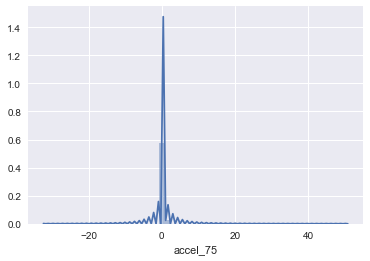

In [14]:
sns.distplot(df_local_all.accel_75)

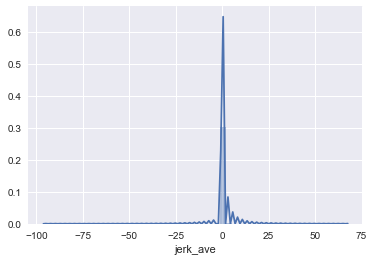

In [15]:
sns.distplot(df_local_all.jerk_ave)

In [16]:
df_local = df_local_all[['speed_90','speed_ave','accel_75','speed_50','accel_ave','distance_traveled','time_traveled']]

In [17]:
X = StandardScaler()
X = X.fit_transform(df_local)

In [18]:
Sum_of_squared_distances = []
scores = []
cluster_count = []
K= range(2,15,1)
for i in K:
    km = KMeans(n_clusters=i)
    km.fit(X)
    pred =km.predict(X)
    Sum_of_squared_distances.append(km.inertia_)
    scores.append(silhouette_score(X, pred))
    cluster_count.append(i)
    print(Counter(pred))
    print(str(silhouette_score(X, pred)) + ' clusters:' +str(i))
    print('------')





Counter({0: 10680, 1: 4192})
0.438119158316 clusters:2
------
Counter({0: 9199, 2: 3730, 1: 1943})
0.420085989805 clusters:3
------
Counter({0: 9197, 1: 3733, 2: 1935, 3: 7})
0.422936381019 clusters:4
------
Counter({0: 8608, 4: 3849, 1: 1868, 2: 536, 3: 11})
0.421157724438 clusters:5
------
Counter({5: 6909, 2: 4213, 1: 1888, 0: 1844, 4: 11, 3: 7})
0.363849443093 clusters:6
------
Counter({0: 6504, 2: 4037, 5: 2097, 6: 1729, 1: 487, 4: 11, 3: 7})
0.360086694401 clusters:7
------
Counter({0: 6568, 1: 4024, 3: 2055, 7: 1733, 2: 475, 6: 7, 5: 7, 4: 3})
0.362049248995 clusters:8
------
Counter({3: 5326, 0: 3627, 8: 2511, 6: 1696, 2: 1235, 1: 460, 4: 7, 7: 7, 5: 3})
0.300555201391 clusters:9
------
Counter({6: 5273, 3: 3612, 1: 2330, 0: 1383, 9: 1232, 2: 779, 7: 246, 5: 7, 4: 7, 8: 3})
0.306727308765 clusters:10
------
Counter({1: 5266, 7: 3612, 0: 2333, 2: 1378, 8: 1237, 9: 778, 5: 247, 6: 10, 3: 7, 4: 3, 10: 1})
0.306838975748 clusters:11
------
Counter({0: 5298, 3: 3603, 11: 2334, 2: 13

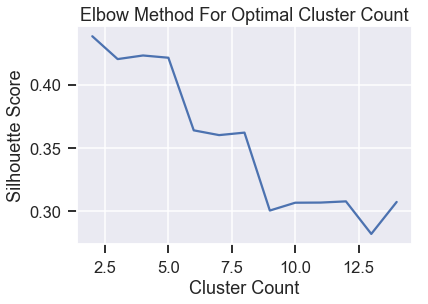

In [19]:
sns.set_context('talk')
sns.lineplot(cluster_count,scores)
plt.xlabel('Cluster Count')
plt.ylabel('Silhouette Score')
plt.title('Elbow Method For Optimal Cluster Count')
plt.show()

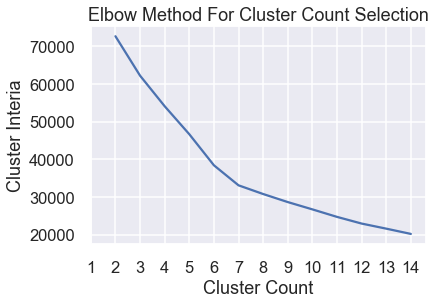

In [37]:
sns.set(font_scale=.75)



sns.set_context('talk')
sns.lineplot(K, Sum_of_squared_distances)
plt.xlabel('Cluster Count')
plt.ylabel('Cluster Interia')
plt.title('Elbow Method For Cluster Count Selection')
plt.xticks(range(1,15,1))
plt.savefig('Kmeans Eblow Plot.png',bbox_inches="tight", dpi = 600)
plt.show()

In [17]:
# scores = []
# EP =[]
# number =[]
# eps= [.001,.005,.01,.05]
# size= [5,10,15,20,25,30,35]
# for ep in eps:
#     for siz in size:
#         db = DBSCAN(eps=ep, min_samples=siz)   
#         pred = db.fit_predict(X)
        
#         print('ep:'+ str(ep) + ' size:'+ str(siz))
#         print(Counter(pred))
#         try:
#             scores.append(silhouette_score(X, pred))
#         except:
#             scores.append(np.nan)
#         EP.append(ep)
#         number.append(siz)



In [18]:


# links=[]
# score=[]
# clusters=[]
# for linkage in ('ward', 'average', 'complete'):
#     for number in range(3,12,1):
#         clustering = AgglomerativeClustering(linkage=linkage, n_clusters=number)
#         pred = clustering.fit_predict(X)
#         try:
#             print('linkage:' + str(linkage) +' clusters:' +str(number))
#             print(silhouette_score(X,pred))
#             print(Counter(pred))
            
#         except:
#             pass
#         links.append(linkage)
#         score.append(silhouette_score(X,pred))
#         clusters.append(number)



In [19]:
df_local_all['cluster'] = KMeans(n_clusters=7).fit_predict(X)

/Users/williamyee/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [20]:
df_local_all[df_local_all.cluster == 0].describe()

,speed_10,speed_25,speed_50,speed_75,speed_90,speed_ave,accel_10,accel_25,accel_50,accel_75,accel_90,accel_ave,jerk_10,jerk_25,jerk_50,jerk_75,jerk_90,jerk_ave,bearingRate_10,bearingRate_25,bearingRate_50,bearingRate_75,bearingRate_90,bearingRate_ave,distance_traveled,time_traveled,last_lat,last_long,start_lat,start_long,cluster
count,1732.000000,1732.000000,1732.000000,1732.000000,1732.000000,1732.000000,1732.000000,1732.000000,1.732000e+03,1732.000000,1732.000000,1732.000000,1732.000000,1732.000000,1732.000000,1732.000000,1732.000000,1732.000000,1732.000000,1732.000000,1.732000e+03,1732.000000,1732.000000,1732.000000,1732.000000,1732.000000,1732.000000,1732.000000,1732.000000,1732.000000,1732.0
mean,1.006148,2.517455,5.590227,11.571119,19.060961,8.372399,-1.189384,-0.391489,-3.774998e-03,0.335616,0.936849,-0.150675,-0.658059,-0.186745,0.044071,0.310407,0.858897,0.104245,0.000007,0.000018,4.639355e-05,0.000122,0.000408,0.000255,11.741269,203.516012,39.501829,114.305749,39.499119,114.304803,0.0
std,1.204193,2.353546,4.588931,8.010261,10.591341,4.477730,1.637623,0.373304,1.658896e-02,0.205343,0.519940,0.545767,0.751202,0.322996,0.388920,0.792646,1.589522,0.693407,0.000041,0.000069,1.522344e-04,0.000403,0.002443,0.000748,7.871883,54.019278,2.914169,20.480585,2.913431,20.481822,0.0
min,0.000000,0.000000,0.062640,0.349920,1.182242,0.429751,-51.299830,-7.930414,-1.962257e-01,0.002684,0.009023,-13.784337,-5.647277,-2.113120,-0.024730,0.000005,0.000089,-0.985571,0.000000,0.000000,3.552714e-11,0.000004,0.000011,0.000005,0.513356,74.050000,1.339992,-122.141763,1.289328,-122.255148,0.0
25%,0.251280,1.130310,2.690103,4.856398,9.502466,4.973401,-1.465314,-0.517502,-8.495998e-03,0.187435,0.521770,-0.126455,-0.899526,-0.289021,0.001152,0.070754,0.180844,-0.002618,0.000001,0.000004,1.073735e-05,0.000024,0.000049,0.000032,5.566176,157.495833,39.950919,116.317625,39.946531,116.314982,0.0
50%,0.645301,1.971447,3.816592,8.835657,18.488502,7.443249,-0.977961,-0.319412,-1.314155e-03,0.292800,0.886456,-0.026551,-0.451833,-0.111342,0.005423,0.150567,0.527284,0.002707,0.000002,0.000007,1.611399e-05,0.000039,0.000082,0.000062,10.030483,202.425000,39.978439,116.331421,39.976449,116.330338,0.0
75%,1.384649,2.862139,6.860021,16.644633,26.447879,10.778806,-0.575120,-0.189954,4.560856e-07,0.465908,1.275717,0.003182,-0.171856,-0.057940,0.014387,0.354271,0.988165,0.029857,0.000004,0.000009,2.687401e-05,0.000066,0.000145,0.000174,16.221588,249.191667,39.998475,116.417378,39.994530,116.417690,0.0
max,12.735189,20.920456,27.259142,40.566693,50.171781,34.290329,-0.000665,0.004361,3.355285e-01,1.385995,3.452754,0.490971,4.408373,5.844604,9.015227,17.016686,25.024175,13.109564,0.001304,0.001432,2.313537e-03,0.006317,0.064281,0.013676,49.620422,299.916667,50.107253,135.767683,50.106783,135.771867,0.0


In [21]:
df_local_all[df_local_all.cluster == 1].describe()

,speed_10,speed_25,speed_50,speed_75,speed_90,speed_ave,accel_10,accel_25,accel_50,accel_75,accel_90,accel_ave,jerk_10,jerk_25,jerk_50,jerk_75,jerk_90,jerk_ave,bearingRate_10,bearingRate_25,bearingRate_50,bearingRate_75,bearingRate_90,bearingRate_ave,distance_traveled,time_traveled,last_lat,last_long,start_lat,start_long,cluster
count,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.0
mean,1.715281,3.060943,4.829529,8.093398,12.131906,6.355151,-1.344376,-0.493294,-0.015882,0.397137,1.074046,-0.153825,-0.858027,-0.248936,0.091278,0.469480,1.129450,0.131892,0.000011,0.000020,0.000053,0.000145,0.000354,0.000204,2.172432,26.497011,39.653026,115.210296,39.653050,115.210521,1.0
std,1.547298,2.001215,2.394922,4.113602,6.217888,2.460523,1.548380,0.613437,0.261282,0.374098,0.817382,0.611796,1.304204,0.708343,0.709277,1.152194,2.014753,0.902606,0.000121,0.000160,0.000930,0.002337,0.003876,0.001409,2.255823,25.823408,2.214616,15.725738,2.214400,15.725801,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-51.777575,-21.102781,-10.591342,-10.591342,-10.591342,-18.623233,-19.901413,-10.468021,-10.468021,-10.468021,-10.468021,-10.468021,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.288490,-149.875950,1.290415,-149.875858,1.0
25%,0.654840,1.798801,3.081600,4.635011,7.152853,4.250659,-1.596618,-0.612445,-0.019872,0.203904,0.559727,-0.119048,-1.019777,-0.368754,0.001987,0.085966,0.234806,-0.003425,0.000002,0.000004,0.000011,0.000025,0.000045,0.000024,0.678911,8.916667,39.969325,116.313017,39.970001,116.315083,1.0
50%,1.363681,2.505594,3.970792,7.631989,10.717983,6.439478,-1.086301,-0.398249,-0.003306,0.347191,0.979191,-0.025319,-0.643325,-0.192180,0.011073,0.253333,0.715406,0.004020,0.000002,0.000007,0.000017,0.000036,0.000071,0.000041,1.491346,17.816667,39.978055,116.330328,39.977475,116.329083,1.0
75%,2.114100,3.776404,6.586213,10.371620,17.091034,8.179353,-0.646925,-0.218392,0.003886,0.533245,1.363977,0.000551,-0.208719,-0.065908,0.034645,0.464067,1.134332,0.040097,0.000004,0.000011,0.000028,0.000061,0.000125,0.000088,2.771017,34.966667,39.988992,116.380953,39.990587,116.375347,1.0
max,16.642911,16.642911,16.642911,23.038731,30.929319,16.642911,7.022408,7.022408,7.022408,7.022408,8.940599,7.022408,26.016662,26.016662,26.016662,30.412070,40.605800,26.016662,0.008456,0.008480,0.073101,0.145625,0.147444,0.073241,18.850027,140.133333,61.217443,135.748283,61.216963,135.751367,1.0


In [22]:
df_local_all[df_local_all.cluster == 2].describe()

,speed_10,speed_25,speed_50,speed_75,speed_90,speed_ave,accel_10,accel_25,accel_50,accel_75,accel_90,accel_ave,jerk_10,jerk_25,jerk_50,jerk_75,jerk_90,jerk_ave,bearingRate_10,bearingRate_25,bearingRate_50,bearingRate_75,bearingRate_90,bearingRate_ave,distance_traveled,time_traveled,last_lat,last_long,start_lat,start_long,cluster
count,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,4.860000e+02,4.860000e+02,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.0
mean,8.063254,16.116241,28.015853,38.709721,47.181022,28.154918,-1.372905,-0.548440,0.007364,0.549878,1.276882,-0.037956,-1.148286,-0.443500,0.002696,0.451026,1.175020,0.006529,5.727855e-06,1.557029e-05,0.000045,0.000132,0.000391,0.000656,46.076300,161.887894,39.566998,107.660852,39.556715,107.682011,2.0
std,7.727233,10.792664,12.478878,11.974031,11.509528,9.338826,0.569485,0.222523,0.023040,0.193361,0.455759,0.150240,0.906008,0.343284,0.012050,0.363517,0.948133,0.089463,3.928066e-05,8.168087e-05,0.000208,0.000610,0.001809,0.003438,17.879808,68.349029,3.298938,44.868017,3.324251,44.873393,0.0
min,0.000000,0.038160,2.092319,5.194343,9.655214,5.678411,-4.186776,-1.273993,-0.085952,0.026608,0.102590,-1.070425,-4.633195,-1.566058,-0.021252,0.000329,0.002411,-1.357927,0.000000e+00,3.019807e-11,0.000002,0.000004,0.000007,0.000004,17.728315,39.966667,22.165442,-122.186363,22.287707,-122.186389,2.0
25%,1.901648,6.412164,19.283813,31.235515,39.644146,21.640623,-1.605359,-0.657001,0.000000,0.442565,1.016000,-0.076291,-1.667526,-0.633219,-0.001607,0.127490,0.336772,-0.008656,1.336419e-07,2.148688e-06,0.000004,0.000009,0.000025,0.000016,32.776940,107.695833,39.859697,116.257647,39.862967,116.258068,2.0
50%,4.812341,15.384166,27.925136,37.654681,45.551574,27.243156,-1.267939,-0.517039,0.000376,0.530873,1.238217,-0.030774,-0.948754,-0.421636,0.000306,0.413668,0.948185,-0.001448,1.340586e-06,2.685211e-06,0.000009,0.000021,0.000054,0.000059,40.351171,148.466667,39.981040,116.323689,39.976737,116.323217,2.0
75%,12.685788,23.366717,35.781830,45.375854,55.354696,33.946138,-1.004787,-0.412997,0.011073,0.656095,1.485854,0.015809,-0.338413,-0.130533,0.003987,0.639512,1.662995,0.006344,2.570604e-06,8.985002e-06,0.000027,0.000072,0.000162,0.000166,55.061285,216.483333,40.048723,116.447746,40.038396,116.448913,2.0
max,54.038466,63.550463,70.643548,72.322557,74.509282,64.334300,-0.086061,-0.007855,0.101768,1.217097,3.200194,1.830643,-0.002592,-0.000789,0.131851,1.807314,4.957304,1.041866,8.138519e-04,1.613482e-03,0.003795,0.010602,0.030080,0.046704,98.792462,299.750000,51.410210,123.577305,51.260097,123.395463,2.0


In [23]:
df_local_all[df_local_all.cluster == 3].describe()

,speed_10,speed_25,speed_50,speed_75,speed_90,speed_ave,accel_10,accel_25,accel_50,accel_75,accel_90,accel_ave,jerk_10,jerk_25,jerk_50,jerk_75,jerk_90,jerk_ave,bearingRate_10,bearingRate_25,bearingRate_50,bearingRate_75,bearingRate_90,bearingRate_ave,distance_traveled,time_traveled,last_lat,last_long,start_lat,start_long,cluster
count,2092.000000,2092.000000,2092.000000,2092.000000,2092.000000,2092.000000,2092.000000,2092.000000,2092.000000,2092.000000,2092.000000,2092.000000,2092.000000,2092.000000,2092.000000,2092.000000,2092.000000,2092.000000,2.092000e+03,2.092000e+03,2092.000000,2092.000000,2092.000000,2092.000000,2092.000000,2092.000000,2092.000000,2092.000000,2092.000000,2092.000000,2092.0
mean,8.187448,17.057365,29.012365,38.285956,44.604047,27.902315,-1.665124,-0.700703,-0.012153,0.638897,1.470653,-0.100817,-1.238611,-0.460696,0.029346,0.520946,1.327599,0.032829,1.034823e-05,2.177087e-05,0.000054,0.000150,0.000412,0.000207,11.108427,38.430864,39.742670,113.077941,39.736222,113.074999,3.0
std,7.668105,8.571924,7.619020,6.878218,7.661056,5.979756,1.805883,0.941166,0.375653,0.475690,1.080125,0.735706,1.896669,0.834778,0.564357,1.207608,2.259152,0.664004,6.605871e-05,1.174735e-04,0.000236,0.000682,0.002042,0.000791,6.328530,37.983816,2.089698,26.979571,2.092563,26.976124,0.0
min,0.000000,0.561240,2.747057,3.104684,3.445753,19.600475,-32.239578,-20.935705,-8.185023,-3.701076,-3.701076,-18.661477,-29.414839,-15.400700,-7.657211,-3.208735,-0.539649,-9.853886,0.000000e+00,8.853362e-12,0.000002,0.000002,0.000007,0.000003,0.008957,0.000000,18.254485,-122.298802,18.413318,-122.296952,3.0
25%,2.536826,11.438133,23.780194,33.184958,39.523730,23.597081,-1.806858,-0.759275,-0.011504,0.469215,1.064350,-0.101559,-1.685080,-0.644167,-0.005509,0.116599,0.305498,-0.014444,1.348789e-07,2.282876e-06,0.000005,0.000013,0.000032,0.000016,6.779432,16.079167,39.967007,116.323306,39.953560,116.319560,3.0
50%,6.001804,16.438501,27.657717,37.384814,43.414292,26.642267,-1.331693,-0.593533,0.000109,0.609325,1.328638,-0.038734,-0.771950,-0.293199,0.000140,0.303692,0.806155,-0.001496,2.009813e-06,4.431191e-06,0.000011,0.000027,0.000061,0.000043,9.935289,26.033333,39.984983,116.341285,39.980820,116.339380,3.0
75%,11.880977,22.345745,33.374264,42.092047,48.592672,30.832534,-1.070979,-0.454194,0.020249,0.740464,1.615548,0.018072,-0.292631,-0.125865,0.007206,0.650760,1.700802,0.009247,4.433629e-06,1.245538e-05,0.000034,0.000088,0.000199,0.000121,14.606920,46.325000,40.018853,116.432856,39.997387,116.420800,3.0
max,67.010679,67.826839,69.436795,71.663721,74.144257,78.650970,3.235476,3.242761,4.730400,7.782686,18.053213,4.159924,10.072709,10.072709,17.340241,34.242481,42.410662,20.116803,1.905764e-03,4.072233e-03,0.006871,0.013731,0.051384,0.012350,31.938795,299.016667,50.104718,142.879530,50.113548,142.879508,3.0


In [24]:
df_local_all[df_local_all.cluster == 4].describe()

,speed_10,speed_25,speed_50,speed_75,speed_90,speed_ave,accel_10,accel_25,accel_50,accel_75,accel_90,accel_ave,jerk_10,jerk_25,jerk_50,jerk_75,jerk_90,jerk_ave,bearingRate_10,bearingRate_25,bearingRate_50,bearingRate_75,bearingRate_90,bearingRate_ave,distance_traveled,time_traveled,last_lat,last_long,start_lat,start_long,cluster
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,1.100000e+01,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.0
mean,9.738318,11.024532,12.682637,18.752652,28.691901,74.744578,-20.050953,-16.529773,-12.240583,-8.061412,-6.359101,-34.971152,20.674912,20.772280,20.902670,21.036365,21.234937,30.381117,4.428107e-05,0.000069,0.000182,0.000882,0.004195,0.002692,4.554232,51.518182,39.127539,115.198775,39.116459,115.209137,4.0
std,18.525166,17.949053,17.218206,15.609230,16.560612,61.227257,24.019826,19.704648,14.724338,12.593394,12.437042,18.381019,25.173180,25.209970,25.305612,25.404949,25.360822,19.471711,5.955186e-05,0.000067,0.000197,0.001468,0.007210,0.002864,4.167191,78.302096,2.854834,3.695613,2.850684,3.698984,0.0
min,0.772396,2.049736,2.666252,3.078190,3.468157,6.201606,-60.536034,-50.400702,-33.508482,-32.213377,-32.213377,-87.739218,-0.129873,-0.013791,-0.000273,0.001560,0.007630,5.183406,3.666401e-13,0.000002,0.000007,0.000016,0.000027,0.000013,0.010100,0.000000,30.522487,104.056324,30.522487,104.056324,4.0
25%,1.357560,2.574656,3.658881,9.093606,16.999779,24.195794,-33.415637,-31.088403,-24.891293,-13.014645,-5.038725,-35.415781,-0.015434,-0.002270,0.000159,0.004645,0.131711,13.638728,1.007151e-05,0.000025,0.000030,0.000051,0.000110,0.000048,0.247636,1.850000,39.930850,116.305258,39.975350,116.313296,4.0
50%,1.520147,3.035773,5.522728,13.851952,34.555708,63.459823,-2.974206,-0.286921,-0.014322,0.014297,0.044480,-29.963429,-0.004180,-0.001055,0.002133,0.037343,0.807749,37.584847,2.242176e-05,0.000047,0.000134,0.000202,0.000381,0.002695,6.567418,30.283333,39.977510,116.316062,39.976100,116.329633,4.0
75%,2.709197,5.216522,8.582786,22.455353,37.384839,110.509595,-0.488967,-0.068203,-0.005358,0.043461,0.319790,-25.863650,38.180744,38.235524,38.939258,39.642993,40.065233,41.241042,4.580116e-05,0.000084,0.000233,0.000901,0.005839,0.004946,8.152576,41.550000,40.033100,116.327983,39.977532,116.331187,4.0
max,55.901173,55.901173,55.901173,55.901173,55.901173,189.688274,-0.054224,-0.017942,0.001896,0.091226,0.770143,-19.107209,67.568694,67.568694,67.568694,67.568694,67.568694,67.568694,1.961015e-04,0.000196,0.000638,0.004786,0.022643,0.007168,9.279166,226.866667,40.077017,116.333150,40.076083,116.333450,4.0


In [25]:
df_local_all[df_local_all.cluster == 5].describe()

,speed_10,speed_25,speed_50,speed_75,speed_90,speed_ave,accel_10,accel_25,accel_50,accel_75,accel_90,accel_ave,jerk_10,jerk_25,jerk_50,jerk_75,jerk_90,jerk_ave,bearingRate_10,bearingRate_25,bearingRate_50,bearingRate_75,bearingRate_90,bearingRate_ave,distance_traveled,time_traveled,last_lat,last_long,start_lat,start_long,cluster
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.0
mean,13.422603,15.425563,19.082211,24.260899,27.286605,20.127327,17.403216,19.434414,22.662671,24.595307,25.805815,21.786891,-28.316268,-28.165452,-27.782498,-23.862957,-21.557699,-25.415749,0.000768,0.000779,0.000797,0.000807,0.000813,0.000792,0.017965,0.019048,39.959666,116.342843,39.959745,116.342919,5.0
std,13.940629,14.811723,18.293653,24.255709,28.429641,18.828049,21.138227,17.373605,12.920214,12.254415,12.742349,13.789528,31.322413,31.473750,31.878404,35.183228,38.064465,33.596381,0.001131,0.001130,0.001130,0.001131,0.001131,0.001130,0.024886,0.033923,0.046581,0.065751,0.046485,0.065698,0.0
min,0.820798,0.820798,0.820798,0.820798,0.820798,0.820798,-21.454727,-8.386397,13.394154,14.196066,14.196066,7.516365,-96.210263,-96.210263,-96.210263,-96.210263,-96.210263,-96.210263,0.000005,0.000005,0.000005,0.000005,0.000005,0.000005,0.000228,0.000000,39.860120,116.257612,39.860467,116.257990,5.0
25%,4.088769,5.529596,5.529596,5.529596,5.529596,5.529596,14.756156,14.756156,14.756156,18.168770,18.516390,14.756156,-27.202402,-27.202402,-27.202402,-27.202402,-27.202402,-27.202402,0.000128,0.000129,0.000130,0.000131,0.000132,0.000130,0.001536,0.000000,39.958193,116.305490,39.958193,116.305490,5.0
50%,9.273580,12.171681,12.171681,12.171681,12.171681,12.171681,18.489406,19.639460,20.456715,22.080542,22.080542,20.204040,-17.095612,-17.095612,-17.095612,-17.095612,-17.095612,-17.095612,0.000280,0.000280,0.000280,0.000280,0.000280,0.000280,0.003381,0.000000,39.971652,116.325032,39.971652,116.325032,5.0
75%,17.913432,22.033914,31.186330,41.231937,47.259301,34.524799,22.299223,22.299223,22.299223,24.437963,28.327123,22.299223,-14.639524,-14.619790,-14.586899,-4.720999,-4.042304,-6.398041,0.000812,0.000849,0.000910,0.000944,0.000965,0.000892,0.032086,0.025000,39.986635,116.381962,39.986635,116.382036,5.0
max,39.859441,39.859441,47.151145,63.310750,72.435960,47.790021,50.677074,50.677074,50.677074,50.677074,50.677074,50.677074,-1.224148,-0.207906,2.406994,10.111977,24.891391,2.596521,0.003214,0.003214,0.003214,0.003214,0.003214,0.003214,0.054904,0.083333,39.996231,116.442357,39.996441,116.442357,5.0


In [26]:
df_local_all[df_local_all.cluster == 6].describe()

,speed_10,speed_25,speed_50,speed_75,speed_90,speed_ave,accel_10,accel_25,accel_50,accel_75,accel_90,accel_ave,jerk_10,jerk_25,jerk_50,jerk_75,jerk_90,jerk_ave,bearingRate_10,bearingRate_25,bearingRate_50,bearingRate_75,bearingRate_90,bearingRate_ave,distance_traveled,time_traveled,last_lat,last_long,start_lat,start_long,cluster
count,4031.000000,4031.000000,4031.000000,4031.000000,4031.000000,4031.000000,4031.000000,4031.000000,4031.000000,4031.000000,4031.000000,4031.000000,4031.000000,4031.000000,4031.000000,4031.000000,4031.000000,4031.000000,4031.000000,4.031000e+03,4031.000000,4031.000000,4031.000000,4031.000000,4031.000000,4031.000000,4031.000000,4031.000000,4031.000000,4031.000000,4031.0
mean,2.277060,5.240320,11.702724,21.781560,31.974408,14.776704,-1.837567,-0.644133,-0.001604,0.561703,1.424746,-0.177036,-1.007865,-0.280725,0.057801,0.450902,1.311670,0.120234,0.000011,2.380224e-05,0.000060,0.000186,0.000566,0.000292,7.441783,39.167432,39.659328,115.976845,39.662693,115.978324,6.0
std,2.335565,3.642564,5.432216,7.063070,7.140583,3.519590,2.440279,0.747738,0.212329,0.349128,0.941825,0.780993,1.460738,0.633538,0.768665,1.525434,2.951832,1.076084,0.000062,1.200576e-04,0.000267,0.001303,0.004134,0.001467,5.407229,29.522177,2.082221,9.853929,2.082746,9.852849,0.0
min,0.000000,0.037661,0.629998,3.096054,4.836226,6.910238,-55.697911,-18.445511,-5.833051,-1.580362,-1.075030,-13.655120,-33.678029,-12.157355,-6.970112,-6.970112,-6.970112,-6.970112,0.000000,5.826450e-12,0.000001,0.000002,0.000005,0.000003,0.003289,0.000000,1.290813,-122.141984,1.340338,-122.137546,6.0
25%,0.777660,2.628005,7.244288,18.100438,26.462765,11.950182,-1.966080,-0.721292,-0.015428,0.385567,1.034007,-0.158294,-1.215221,-0.364779,-0.000262,0.145236,0.370293,-0.008665,0.000001,4.029735e-06,0.000011,0.000027,0.000058,0.000029,2.562558,15.825000,39.956347,116.325552,39.964352,116.325397,6.0
50%,1.654921,3.846002,11.909760,22.114746,30.772206,14.503460,-1.407949,-0.533930,0.000000,0.548128,1.322082,-0.023048,-0.656781,-0.223737,0.003431,0.246573,0.711470,0.001108,0.000002,6.649374e-06,0.000017,0.000040,0.000094,0.000059,6.983768,34.333333,39.975857,116.332817,39.981473,116.337844,6.0
75%,2.710067,7.266882,15.817566,26.056851,37.202427,17.481357,-1.040311,-0.400909,0.017286,0.686952,1.614447,0.025907,-0.364130,-0.133399,0.013615,0.399007,1.312120,0.026684,0.000004,1.073986e-05,0.000030,0.000083,0.000202,0.000127,10.535776,52.816667,40.000371,116.432690,40.012006,116.431348,6.0
max,22.022125,22.022125,25.149665,43.608418,74.416968,40.664998,6.532163,6.532163,6.532163,6.965885,16.790400,6.532163,10.006339,13.839421,20.546732,54.780507,75.036253,31.455117,0.001942,4.520300e-03,0.008817,0.070615,0.126804,0.052833,38.251737,185.416667,50.075505,126.414643,50.105408,126.562443,6.0


In [27]:
df_local_all[df_local_all.cluster == 7].describe()

,speed_10,speed_25,speed_50,speed_75,speed_90,speed_ave,accel_10,accel_25,accel_50,accel_75,accel_90,accel_ave,jerk_10,jerk_25,jerk_50,jerk_75,jerk_90,jerk_ave,bearingRate_10,bearingRate_25,bearingRate_50,bearingRate_75,bearingRate_90,bearingRate_ave,distance_traveled,time_traveled,last_lat,last_long,start_lat,start_long,cluster
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
# df_local['cluster'] = AgglomerativeClustering(linkage='ward', n_clusters=3).fit_predict(X)

In [99]:
df_local_all.to_csv('df_local_all_2.csv')

In [97]:
pickle.dump(df_local_all,open('df_local_all.p','wb'))